In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_prediction import Replicator
from pneumococcus_data import data_observation
#from compute_dynamics import *

In [2]:
from PSO_algo import PSO

In [3]:
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()
Brazil_strain = np.array(Brazil.strain)
Brazil_cases = np.array(Brazil.cases)
strain_number = len(Brazil_strain) #=26
length = strain_number**2
# muy-values of Brazil
mu = 6

In [4]:
#initial value
u0 = (1/strain_number)*np.ones(strain_number)

#cost function for gp_minimize
def func(vector):
    # insert alpha vector to Brazil_alpha
    vector = np.array(vector)
    alpha_matrix = vector.reshape(strain_number, strain_number)

    #compute invasion fitness matrix
    lambd = np.zeros((strain_number, strain_number))
    for i in range (0, strain_number):
        for j in range (0, strain_number):
            lambd[i][j] = mu*(alpha_matrix[j][i] - alpha_matrix[i][j]) + alpha_matrix[j][i] - alpha_matrix[j][j]

    #compute solution of replicator equations at t = 50
    solution = Replicator(strain_number, lambd, 50, u0)
    # mu, A, fit, resultat, nc = simu(T = 50, mu = 6, A = alpha_matrix, z0 = u0)
    # solution = resultat.y[:,-1]
    solution = sorted(solution, reverse=True) #sort by descending
    err = np.linalg.norm(solution - Brazil_cases)
    return err

In [5]:
# RUN PSO algo
# initial starting location [x1,x2...]
initial = [0]*length
#time 1: 3h10m

# input bounds [(x1_min,x1_max),(x2_min,x2_max)...]
bounds = []
for i in range (0, length):
    bounds.append(np.array([-10, 10]))
bounds = np.array(bounds)

PSO(func, initial, bounds, num_particles = 800, maxiter = 800)

FINAL:
[0.7592581763020514, -0.004098110065966838, -0.3986168400803117, -0.02069938258531115, -0.539486119420299, -0.024447574553097675, -0.1079849668736679, 0.888353875270256, 0.5971359077734041, 0.5012360961803531, -1.173982631469581, 0.13168537738918604, -0.3625765527781179, 0.1684871280612531, -0.48878150767205825, -0.292694384926675, -0.2060265917155966, -0.9179657110348494, 0.22602851459594614, -0.2284390560877504, -0.2732188367922683, -0.7060754513309946, -0.11224979199796285, 0.3647017108927175, -0.07950266067309217, 0.342730332983742, -0.627442613571445, 0.3127418141114569, -0.33213478872247787, 0.6729258239253636, 0.07787559048386876, -0.3018196719043225, 0.028555215782610954, -0.48258638846629326, 0.03422205964450254, -0.25249120265750674, -1.2012197024311466, -0.38559775802641294, 0.08143095931779902, 0.014474356013934665, -0.9637357683146218, 0.2839542018854008, -0.41435542981298523, -0.33676164850170953, -0.29536851130875075, 0.09593850518676023, 0.7238184103134359, 1.454

In [12]:
#import the matrix unarranged (initial version) to arrange it
Brazil_alpha_reorder = [0.7592581763020514, -0.004098110065966838, -0.3986168400803117, -0.02069938258531115, -0.539486119420299, -0.024447574553097675, -0.1079849668736679, 0.888353875270256, 0.5971359077734041, 0.5012360961803531, -1.173982631469581, 0.13168537738918604, -0.3625765527781179, 0.1684871280612531, -0.48878150767205825, -0.292694384926675, -0.2060265917155966, -0.9179657110348494, 0.22602851459594614, -0.2284390560877504, -0.2732188367922683, -0.7060754513309946, -0.11224979199796285, 0.3647017108927175, -0.07950266067309217, 0.342730332983742, -0.627442613571445, 0.3127418141114569, -0.33213478872247787, 0.6729258239253636, 0.07787559048386876, -0.3018196719043225, 0.028555215782610954, -0.48258638846629326, 0.03422205964450254, -0.25249120265750674, -1.2012197024311466, -0.38559775802641294, 0.08143095931779902, 0.014474356013934665, -0.9637357683146218, 0.2839542018854008, -0.41435542981298523, -0.33676164850170953, -0.29536851130875075, 0.09593850518676023, 0.7238184103134359, 1.4549490456618661, 0.03476135261684767, -0.2357329793465965, 1.1463261683832187, -0.4385458649462699, 0.22478802112760748, -0.18774774536337066, -0.11499644212715883, 0.20190276802598459, 0.009451900659746298, 0.24007178890555742, -0.6046590257446922, 0.12274462683601449, 0.16507704553082103, -1.4067126526885392, -0.477957585353393, -1.2104991385999235, -0.15064593673907906, 0.14229414593627418, 0.13909356975057435, -0.5078921608875366, -1.1471411180367879, 1.4107486726471472, 0.1899894151248138, -0.4868566370635432, -0.5666338905886623, 0.33492871360561627, 0.3976858368005959, -0.11947906304335956, -0.05789250507951969, 0.09014434345865789, -0.04392140722989708, -0.31341329139918045, -0.4113656161046542, -0.6766612590525812, -1.1444709981995511, -0.12646760231558238, -0.08678188977130735, -1.434553906600958, -0.46333662247440643, -0.1980815741772482, 0.21196731690986584, 0.43813551992526484, 0.5658311527005291, -0.4563259145912995, -0.006356959565579997, -0.8750658915087788, 1.4875591237751529, -0.7180556866941991, 0.4127782693316619, 0.1447326720763646, -0.022593506636409046, 0.2289512695411366, 0.5020001359319085, 1.6211268074226906, -0.028939636665290543, 0.11016764171212637, 0.18788357272644116, -0.15887267991087392, -1.1958667858092455, 0.6732252522861731, -0.3086493379737015, 0.0001227330423084237, 0.8847095201465847, -0.2465533422329504, 0.5709766556629409, -0.21340298322020618, 1.3027645437020205, -1.219663010577039, -1.2095457654604946, 0.25455260079822306, -0.13712658926705049, -0.4591152765058157, -1.0477999790386865, 0.4140940399264567, -0.4130654259721135, 0.025475243508336146, -1.0247248577754702, -0.4097815305154177, -0.37335769212527253, -0.01876063400108475, -0.3427963692732879, 0.49653740513349276, -0.06861620546320019, -1.0146199341822524, 0.3111805111969117, -1.1374282111806209, 0.7338379941547304, 0.6944827324854321, -0.0891453580965029, -0.05283588120997124, -0.17668097470435112, -0.529554711519753, -0.1945377247544641, 0.5812798338045985, 0.23216319745560618, -0.34882252432929695, -0.17629154683974999, 0.05563128073910521, 0.16086156192517548, -0.6070713983807592, 0.05679389462866623, -0.2242477331685323, -0.9022939386638797, -0.11127454317029364, -0.04149415671738549, -1.183562092846326, -0.8988253683263384, 0.12031717723487007, -0.024642734479214105, -0.5362196754417221, 0.4703399750598222, -0.12578072636291227, -0.25459559317465785, 0.29984598606791024, -0.576680660253399, -0.09782636029063287, -0.4265201423093339, 0.14595324339818902, 1.0688216033303068, 1.508903731335258, 0.8149102259382501, 1.3043745859072116, -0.9989489012369809, 0.4160277962076853, -0.23112162342126757, 0.4507018476114349, 0.020840038840813035, -0.41120969520570166, 0.6092383642564232, -1.3572771588490111, 0.8570875272410375, -0.21689331034946804, 0.1401036870035486, 0.32681960074368865, 0.20890752531851264, 0.6628143699877425, 0.5520999491726624, -0.07416801002381845, -0.5809550718461, 0.10980162920920475, 1.5530170423936258, 0.049371833551842194, -0.10550367644568605, 0.2911248774845293, 0.07075340080500857, 0.1523224065088866, 0.8258414100949435, 0.5625489137659929, 0.28098446340800837, 0.1653273285368742, -0.03706370069080751, -0.006188754773073955, 0.03276227176947116, -1.2254243110781409, -0.36923647309636115, 0.4239078741455455, 0.876929850989318, -0.018697918805604872, 0.07656778483332495, -1.2908474281101152, 0.12844599047279767, 0.3641175713889978, 0.040463675907804066, -0.1017548119091257, -0.8071169841969492, -0.015354342790389478, 0.294757213300493, -0.08941882281187989, -0.0003596305964158668, 0.24019233840330192, 0.18940349330404158, 0.0950537529980789, 0.08691985737958986, 0.2770894899820104, 0.5866822112087549, -0.043518870828439235, -1.0279719238607574, -0.45108342188396944, 0.7004514209670873, 0.6537033236791341, 0.12993447238109837, 0.6042968515641433, -0.9659050013962616, -0.09118397472588874, 0.44651553023917206, -0.553723496018574, -0.6767869725974403, -0.3568492282357149, 1.1499666503502723, -1.3263519782016038, 0.5125116370282258, -0.1972876021568881, -0.03116148573446826, 0.07518152851534718, -1.186740478017609, -0.1688454103359596, 1.2023122145617222, 0.7750675440870067, -0.42260328263230235, -0.41740897986648107, 1.0455473388481333, -0.07533760385567469, -0.15408981631862187, -0.08094013946476873, 0.06126291016854427, 1.1420972932155744, 0.22285475184038223, 0.18124059350601512, 0.09887115182008117, 0.6150144174546442, -0.3591770697851059, -0.8924156933109149, 0.12810404654747798, -0.6703144721082177, -0.21964881333959155, -0.1538912912660236, 0.20006253224324508, -0.3013742364145351, 0.6463541574367601, 1.0675385795551733, 0.6919610391618609, 0.24695335629320922, -0.5572721385962647, 0.17604680695271013, -0.7554110031204515, -0.442068827719809, 0.8128074009203612, -0.12928021098986284, 0.5502127995602284, -0.4262383655944553, -0.15265530746233716, 1.3984902866366433, -0.1653441035059604, -0.25626931133591896, -0.4728090817457396, 0.2539098304696634, -0.4852533453329892, 2.124566677214333, -0.32122030476109964, -0.2207251324208948, 0.28256107394584673, 0.25564360678051135, -0.23899071491743423, -1.3913010186691417, 0.686566590482998, 0.37444205102196937, 1.4438821649548912, 0.2594885658707765, -0.007735839200725637, -0.4013544997903802, -0.4326099487815673, -0.608336394860959, 0.12879459378536975, 0.6999925434182642, -0.9260241794121032, 0.21141218226419756, 0.593039380349637, 0.04989925412528793, 0.664037694254354, 0.41081199007075403, 0.5663370000013314, 0.6012886445654342, 0.4435754866630101, 0.011554815074904527, -0.389399187872181, 1.019654396776764, -1.6066865814473352, -0.4039878285900702, 0.14242054610188803, 0.9358014334384729, 1.478011811072097, 0.07905705193126365, -0.11784616302680342, -0.9534485536694683, -0.0363988051250205, -0.3459529921456384, 1.5510876222789245, -0.5220773753597809, 0.1098926299897155, -0.18627793370421059, 0.1685169850113691, -0.031002374332650667, -0.19902176426936483, 1.206045039538103, 0.22471424759905917, 0.02914154088972462, 0.9918482447427759, -0.13112493463885047, 0.25474324431963874, 0.22923927295831753, 0.00274115368772203, -1.3910545405659391, 0.05746409682307783, 0.5391275116070211, -0.39646933029355136, -1.1536298493469022, -0.6098242549436484, -0.049460369612836126, -0.22592664803246687, 0.15303471115777909, 0.4572201093219303, -0.051831605147875826, 1.043161309435098, 0.46160181828443186, -0.10391342429727102, 0.03207065641807818, -0.20816025248118047, 0.17240357328362657, -0.20780029342604223, 0.664483206937538, 0.3149029162270136, -0.5813927583651406, 0.7373230690256485, -0.4477022747697773, 0.8299731912936416, 0.48274827949943433, 0.028080561943637512, -1.2828423500675232, 0.14416384201857468, -0.7587230310281344, 0.8688977621218543, 0.3826317365409726, 0.18573835520505694, -1.4860530757105788, 0.24958009644328544, 0.47840750676442445, -0.7443138742577248, 0.40428827041019877, -0.23345393267661552, 0.30415228291935387, 0.36136186972544665, 0.22380669864626948, 0.6364780186465205, -0.04642968350006828, -1.542307433293904, 0.19019365733394492, 0.4457717812115558, 0.653721212990515, 0.46222857931823014, 0.007130567259305459, 0.019875189422264905, -0.35368757452541233, -0.4655635983726828, -0.2058570637515627, -0.3165963821302661, 0.9468589922991407, 0.3140450671692124, -0.014025380704020167, 0.190587349760431, -0.13827105699057932, 0.025541462411812366, -1.0927658335603874, 0.09027002228315384, 0.40757579070345473, 0.29769976707517326, 0.6940045335721928, -0.8210896134351325, 0.10834615413270046, -1.2220218016854336, -0.388055024591212, 0.42362754037166034, 0.12554054631283756, -0.14807899610670108, 0.34622081327462967, -0.26523108065567447, -0.4244800120613827, -0.17242395794461945, 0.6235017369399942, -0.09987075641370873, -1.0813865765954433, -0.4172732325103928, 0.11080665020439198, 0.4759343691913226, -0.025636670581313345, -0.2932655735186202, 0.3001646082665992, -0.10283495897009322, 0.17948827629549297, 0.332893529315499, -0.5865483196318697, 0.4833304799539981, 0.3518677649409905, -0.5991223113673017, 0.19636717696964937, -0.9789459089524434, 0.2013068996819999, -0.655601660697904, -1.6248136007944438, -0.8695434818861891, -0.7202605643515589, -0.7104843526785654, 0.6418586573567759, -0.09943964314296842, -0.5220881063586048, -0.8015825521666137, -0.34828325139740957, 0.010234860739620285, -0.05522152883554208, 0.4697936831894018, 0.04193417685842166, 0.22210452938851769, -1.1276604011998717, 0.7629033832785002, -1.2803672139585307, -0.5956980581705144, -0.3731999569699514, -0.17264483000394665, -0.9717792245837251, 0.1577435336657694, 0.5000183825573057, -0.15805168175757306, 0.4763221316149164, -0.10733577830841219, 0.4619662788008742, 0.7539984372231752, 0.666752185574069, -0.995697424726115, -1.8835152632385197, 0.7724004784645195, -0.12449381532806399, 0.07837985396716873, 0.5332288259435789, 0.40285579506899677, 0.7984648765852606, 0.2522239650308128, 0.343624984296533, -0.3454208258324519, 0.34104434500453557, -0.5571785218757878, 0.9398001513544253, -0.18918464098205423, 0.47193197174766943, 0.1805630893717577, 0.5844494143083815, 0.17227415165327822, -0.7098381070433097, -0.13022255234647698, -0.41760563266903544, 1.3445779859726288, 0.5357642978045933, 0.26170395861637713, 0.25101861041013457, -0.542531467127783, 0.38484797847206437, -0.4374174516499012, -0.2575243697889837, 0.4058719411566746, -0.545763570658277, 0.16551788077190097, 0.43660237915215444, 1.3806974630137714, -1.8152358278991745, -0.1594456121547398, -0.28031535978072414, -0.18416731601402284, -0.22362416924001782, 0.2924019198589457, 0.47224235447576407, 0.28395165110218556, -0.22341851551634984, -0.4566875140335205, 0.5320469984051518, -0.320767568933265, 0.17053348027994378, -0.806668174419832, 0.2715812580661153, 1.5822940364630997, 0.6085939568503781, -0.08230712931847309, 0.43729558640225247, -0.14986721879611822, -0.1914508332371385, 0.6826574651125783, -0.5071297371331246, -0.029461709945103075, -0.297765055443647, -0.023023318286219632, 0.20927374016031378, -0.004443906324060921, -0.19975708142272774, 0.40795762909110894, -0.007806603397950503, 0.35807017561547877, 1.220017953903634, 0.8692056083373146, 0.2253355936706979, -0.5095903841823853, -0.1375104236013692, -2.1825823766771077, 0.36406932622632476, 1.211620411949709, -0.04701984547250393, 0.6038334150905392, -0.24040657852439176, -0.23344161663356094, 0.2907052502915061, -0.48998275608555986, 0.5361990655462059, -0.033433497918518684, 0.23842928949000075, 0.1784711527019272, 2.4574703183207443, 0.9138405911814718, -0.8149602897184552, -0.015065708868245205, 0.5706979091598569, -0.1527894134675207, -0.9611816106029448, -0.46387959911285637, 0.7052222619256685, -0.6611364381200227, -0.2849484200723137, 0.48823763606620046, 0.4859974074478714, 0.20356413863707534, 0.27216823853676936, -0.09575286956652411, -1.069742740660351, -0.8658042292871142, 0.26021766272044766, 0.06596975022627301, -0.664613565184222, 0.6446892913028541, -0.2447452818020617, 1.0683402511941755, -0.36208050773047784, -0.005619358868400978, -0.12974972935040124, -0.27823430112670794, -0.595194385038894, -0.5964345067352267, 0.04864664301959884, -0.4212966196918199, -0.1333315792147001, -0.05438255739007329, -0.13738354407889636, -0.5222937441863286, 0.5581755705204807, 0.45864458588589524, 0.07587161837082701, 0.46747629201319735, 0.07177383737721742, 0.4735842248005263, 0.04432538180297743, 0.4584562607084185, -0.32128545507505457, 0.10022306745885075, 0.3721037657046709, 0.6196242930841983, 0.40644448770835434, 0.07592578290451335, -0.016976317533611243, -0.8947387274279173, 0.5756374197941673, 0.27530748611736205, 0.0344686898630879, 0.011121921471119995, -2.179904975984041, 0.05626589213095755, 0.45123469063870686, 0.40594591360102755, 0.6848112274666301, 0.06980964517881767, -0.006062991709062903, 0.388545613503055, -0.12286607389822682, 0.04746498317557637, 0.01561245448905578, 0.1444639812361569, -1.0334471083569272, 1.3425263472088476, 0.16596276537281313, -0.08883204763014142, 0.08829270020300276, 0.4962349348497428, 0.2917248504317326, -1.5675696230265521, 0.9956656749259711, 0.31668118478755475, -0.02498356083714533, -0.35698443780211503, -0.499542126896865, -0.02026615094384919, -0.985603856791897, 0.7376332554950965, -0.25878575293641304, 0.3958300607427877, -0.04456721167902941, 0.05380666633379676, 0.09919320898442655, -0.2730085485433685, -1.8404721043901089, 0.1036304625227768, -0.2004774952064384, -0.38503954043421185, -0.2894473595026029, 0.1928461287866317, 0.2068231251513446, -0.11456652100854774, 0.3515800794475136, -0.14015434183063177, -0.15654061892698432, -0.48342071805837605, 0.5289325407134595, -0.03710278781535406, 0.09481896961999015, -0.0695130026005031, -0.577599605766172, 0.059761006885434356, 2.9676156308270585, -0.0027546242942915705, 0.6072588677776863, 0.08471440198639037, 0.9489559233360546, -0.41713020024014846, 0.8196512445095444, -0.4037783178144048, -0.3428035358737468, -0.02357198051616383, -0.2953653606151824, 0.1118910097735029, -0.20350603618734253, -0.26201109621091867, 0.5282582778257684, -0.24865992017389338, 1.0118812575760312, -1.0088290130696944, 0.4051946612205849]
Brazil_alpha_reorder = np.array(Brazil_alpha_reorder).reshape(strain_number, strain_number)

#solve the replicator dynamics and import to a database
lambd = np.zeros((strain_number, strain_number))

for i in range (0, strain_number):
    for j in range (0, strain_number):
        lambd[i][j] = mu*(Brazil_alpha_reorder[j][i] - Brazil_alpha_reorder[i][j]) + Brazil_alpha_reorder[j][i] - Brazil_alpha_reorder[j][j]

#UNSORTED SOLUTION
solution = Replicator(strain_number, lambd, 50, u0)
unsort_Brazil_predict = {'cases':  solution}
unsort_Brazil_predict = pd.DataFrame(unsort_Brazil_predict)

prediction = solution #predicted prevalence -- for the final test

#SORT SOLUTION
sort_Brazil_predict = unsort_Brazil_predict.sort_values(['cases'], ascending = False)
new_index = np.array(sort_Brazil_predict.index, dtype = float) #index for re-order real data

In [13]:
#re-arrange observation data of Brazil
#find the appropriate index
data_new_index = np.zeros(strain_number)
Brazil_index = np.array(Brazil.index)
for i in range (0, strain_number):
    temp = np.where(new_index == i)
    data_new_index[i] = Brazil_index[temp[0]]

print(data_new_index)

[19. 24. 17.  0. 11. 20. 10. 25.  1. 14.  6. 16. 12.  8. 13. 23.  9. 22.
 21. 18. 15.  4.  7.  5.  3.  2.]


In [14]:
Brazil_data_reorder = Brazil.reindex(data_new_index)
Brazil_strain_reorder = np.array(Brazil_data_reorder.strain)
print(Brazil_strain_reorder)

Brazil_strain_reorder = np.array(['34', '29', '10A', '6B', '6C', '39', '4', '35B', '19F', '18', '16F', '3', '11A', '6',
                                  '23B', '12F', '19A', '9N', '1', '15A', '23A', '15C', '17F', '23F', '6A', '14'])

['34' '29' '10A' '6B' '6C' '39' '4' '35B' '19F' '18' '16F' '3' '11A' '6'
 '23B' '12F' '19A' '9N' '1' '15A' '23A' '15C' '17F' '23F' '6A' '14']


In [15]:
Brazil_alpha = np.ones((strain_number, strain_number))

for xB, strain_xB in enumerate(Brazil_strain):
    for yB, strain_yB in enumerate(Brazil_strain):
        find_xBrazil = np.where(Brazil_strain_reorder == strain_xB)
        index_xBrazil = find_xBrazil[0]

        find_yBrazil = np.where(Brazil_strain_reorder == strain_yB)
        index_yBrazil = find_yBrazil[0]

        if index_xBrazil.size > 0 and index_yBrazil.size > 0:
            Brazil_alpha[xB, yB] = Brazil_alpha_reorder[index_xBrazil, index_yBrazil]

In [17]:
#solve the replicator dynamics and import to a database
lambd = np.zeros((strain_number, strain_number))

for i in range (0, strain_number):
    for j in range (0, strain_number):
        lambd[i][j] = mu*(Brazil_alpha[j][i] - Brazil_alpha[i][j]) + Brazil_alpha[j][i] - Brazil_alpha[j][j]

#UNSORTED SOLUTION
solution = Replicator(strain_number, lambd, 50, u0)
err = np.linalg.norm(solution - Brazil_cases)
print(err)

np.savetxt('Brazil_alpha.txt', Brazil_alpha, delimiter = ',')

0.01816481167536255


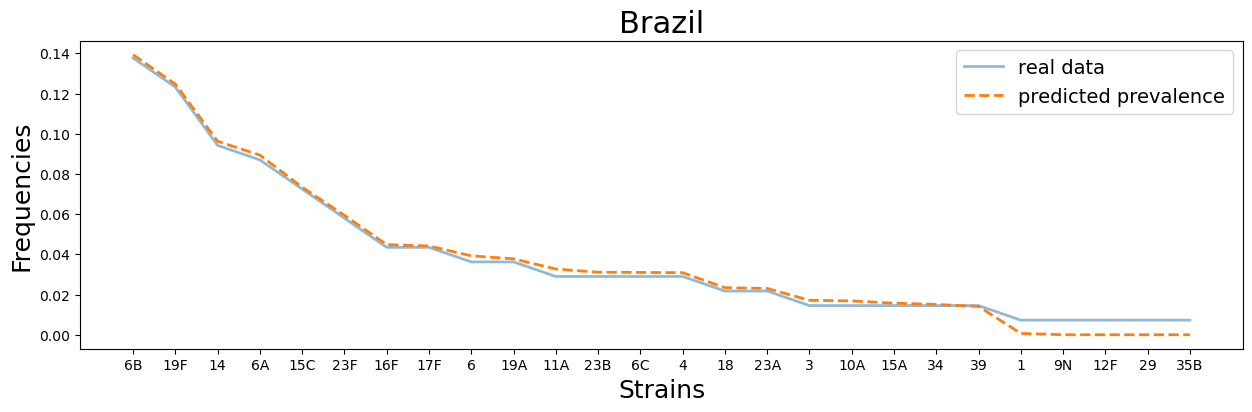

In [19]:
#FINAL TEST by data plot
range_strain = np.linspace(0, strain_number - 1, strain_number)
tick_label = np.array(Brazil.strain)

fig = plt.figure(figsize = (15, 4))
plt.plot(range_strain, Brazil_cases, '-', linewidth = 2, alpha =.5, label = 'real data')
plt.plot(range_strain, solution, '--', linewidth = 2, label = 'predicted prevalence')

plt.xlabel('Strains', fontsize = 18)
plt.ylabel('Frequencies', fontsize = 18)

plt.title('Brazil', fontsize = 22)

plt.xticks(range_strain, labels = tick_label)
plt.legend(fontsize = 14)
plt.show()